# BFS Algorithm

Types of Graph Traversal/Search Method

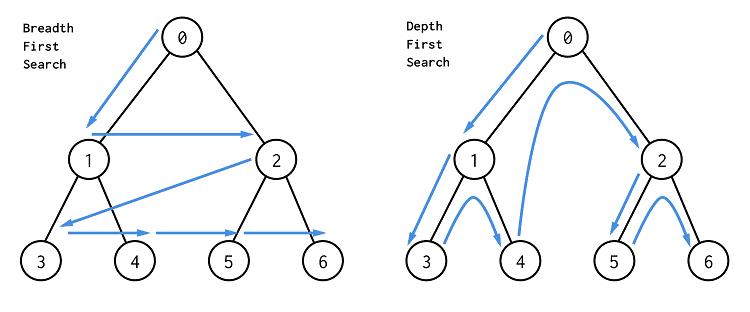
Source Address: https://www.freelancinggig.com/blog/wp-content/uploads/2019/02/BFS-and-DFS-Algorithms.png

Visualization

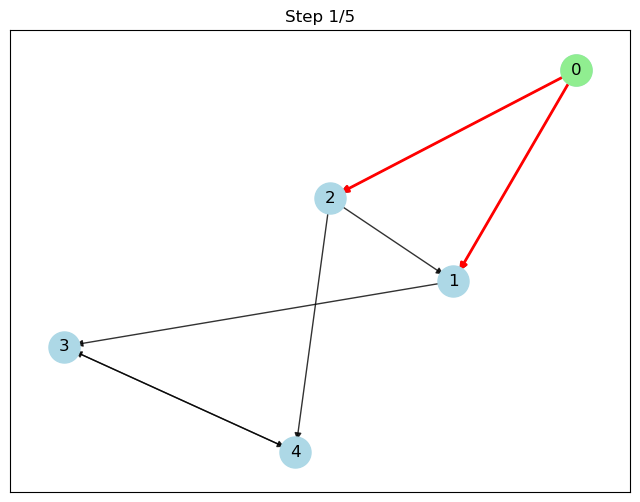

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML


# BFS algorithm
def bfs(graph, start):
    visited = []
    queue = [start]

    while queue:
        vertex = queue.pop(0)
        if vertex not in visited:
            visited.append(vertex)
            neighbors = graph[vertex]
            queue.extend(neighbors)

    return visited

# Define the graph edges
edges = [
    (0, 1), (0, 2), (1, 3), (2, 1), (2, 4), (3, 4), (4, 3)
]

# Create a directed graph
graph = nx.DiGraph()
graph.add_edges_from(edges)

# Perform BFS
bfs_path = bfs(graph, 0)

# Visualization
pos = nx.spring_layout(graph)

fig, ax = plt.subplots(figsize=(8, 6))
ax.set_title("BFS Visualization")
ax.set_axis_off()

# Function to update the graph visualization at each step
def update(step):
    ax.clear()
    nx.draw_networkx_nodes(graph, pos, ax=ax, node_size=500, node_color="lightblue")
    nx.draw_networkx_edges(graph, pos, ax=ax, width=1, alpha=0.8, arrows=True)
    nx.draw_networkx_labels(graph, pos, ax=ax, font_size=12, font_color="black")

    # Highlight visited nodes and current arrows
    visited_nodes = bfs_path[:step+1]
    current_node = bfs_path[step]
    current_arrows = [(bfs_path[i], bfs_path[i+1]) for i in range(step)]
    nx.draw_networkx_nodes(graph, pos, nodelist=visited_nodes, ax=ax, node_size=500, node_color="lightgreen")
    nx.draw_networkx_edges(graph, pos, edgelist=current_arrows, ax=ax, edge_color="red", width=2)
    nx.draw_networkx_edges(graph, pos, edgelist=[(current_node, neighbor) for neighbor in graph[current_node]],
                           ax=ax, edge_color="red", width=2)

    ax.set_title(f"Step {step+1}/{len(bfs_path)}")

# Create the animation
anim = animation.FuncAnimation(fig, update, frames=len(bfs_path), interval=1000, repeat=True)

# Display the animation
HTML(anim.to_jshtml())


---

# Community Detection

/var/folders/z0/zdcstgld2gl88mks8fgkd9f40000gn/T/ipykernel_87999/3595531059.py:72: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap("tab20", num_communities)


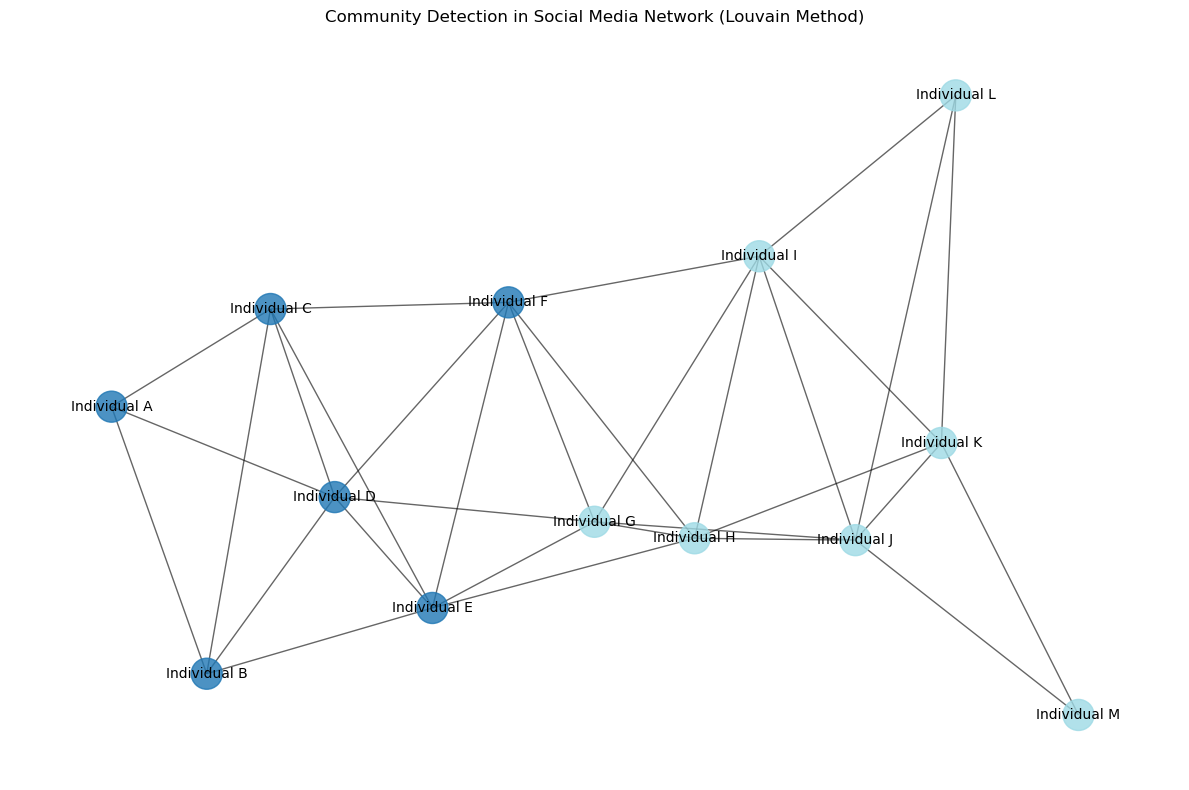

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import community

# Create a social media network graph
G = nx.Graph()

# Add nodes representing individuals in the network
G.add_nodes_from([
    ("Individual A", {"label": "Individual A"}),
    ("Individual B", {"label": "Individual B"}),
    ("Individual C", {"label": "Individual C"}),
    ("Individual D", {"label": "Individual D"}),
    ("Individual E", {"label": "Individual E"}),
    ("Individual F", {"label": "Individual F"}),
    ("Individual G", {"label": "Individual G"}),
    ("Individual H", {"label": "Individual H"}),
    ("Individual I", {"label": "Individual I"}),
    ("Individual J", {"label": "Individual J"}),
    ("Individual K", {"label": "Individual K"}),
    ("Individual L", {"label": "Individual L"}),
    ("Individual M", {"label": "Individual M"}),
])

# Add edges representing connections between individuals
connections = [
    ("Individual A", "Individual B"),
    ("Individual A", "Individual C"),
    ("Individual A", "Individual D"),
    ("Individual B", "Individual C"),
    ("Individual B", "Individual D"),
    ("Individual B", "Individual E"),
    ("Individual C", "Individual D"),
    ("Individual C", "Individual E"),
    ("Individual C", "Individual F"),
    ("Individual D", "Individual E"),
    ("Individual D", "Individual F"),
    ("Individual D", "Individual G"),
    ("Individual E", "Individual F"),
    ("Individual E", "Individual G"),
    ("Individual E", "Individual H"),
    ("Individual F", "Individual G"),
    ("Individual F", "Individual H"),
    ("Individual F", "Individual I"),
    ("Individual G", "Individual H"),
    ("Individual G", "Individual I"),
    ("Individual G", "Individual J"),
    ("Individual H", "Individual I"),
    ("Individual H", "Individual J"),
    ("Individual H", "Individual K"),
    ("Individual I", "Individual J"),
    ("Individual I", "Individual K"),
    ("Individual I", "Individual L"),
    ("Individual J", "Individual K"),
    ("Individual J", "Individual L"),
    ("Individual J", "Individual M"),
    ("Individual K", "Individual L"),
    ("Individual K", "Individual M"),
]

G.add_edges_from(connections)

# Perform community detection using Louvain method
partition = community.best_partition(G)

# Define the positions of the nodes for visualization
pos = nx.spring_layout(G)

# Define colors for the communities
num_communities = max(partition.values()) + 1
colors = plt.cm.get_cmap("tab20", num_communities)

# Create a list of node colors based on community assignments
node_colors = [colors(partition[individual]) for individual in G.nodes()]

# Initialize the figure and layout
fig, ax = plt.subplots(figsize=(12, 8))

# Draw the nodes
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=500, alpha=0.8)

# Draw the edges
nx.draw_networkx_edges(G, pos, alpha=0.6)

# Draw node labels
node_labels = nx.get_node_attributes(G, "label")
nx.draw_networkx_labels(G, pos, labels=node_labels, font_size=10)

# Set plot title and display
ax.set_title("Community Detection in Social Media Network (Louvain Method)")
plt.axis("off")
plt.tight_layout()
plt.show()


~~~
Goal:
Implement and Evaluate these algorithms sequentially and parallelly on CPU, GPU, and PiUMA Architectures
~~~

Benchmarking Tools (NEEDS TO BE UPDATED)

- TIME:
    - To load into memory
    - To complete testing
    - Of a single edge traversal
    - Generating the Traversed Edge Per Second measure.
- MEMORY
    - Latency of memory access (indicator of non-locality memory accesses)
    - Cache misses
    - Distance of memory accesses
- POWER:
    - Traversed Edges per Watt